In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


In [14]:
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'BTC-USD']


In [15]:
prices = yf.download(tickers, start='2015-01-01', end='2022-03-02')['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [16]:
returns = prices.pct_change()


In [21]:
returns.dropna(inplace=True)

In [22]:
returns

,AAPL,AMZN,BTC-USD,GOOG,MSFT
Date,,,,,
2015-01-03,0.000000,0.000000,-0.107767,0.000000,0.000000
2015-01-04,0.000000,0.000000,-0.060079,0.000000,0.000000
2015-01-05,-0.028171,-0.020517,0.038907,-0.020846,-0.009196
2015-01-06,0.000094,-0.022833,0.042682,-0.023177,-0.014677
2015-01-07,0.014022,0.010600,0.028471,-0.001713,0.012705
...,...,...,...,...,...
2022-02-25,0.012965,0.016058,0.022999,0.013914,0.009233
2022-02-26,0.000000,0.000000,-0.002781,0.000000,0.000000
2022-02-27,0.000000,0.000000,-0.035682,0.000000,0.000000


In [30]:
def rebalance(returns, frequency):
    portfolio_weights = np.array([1/len(returns.columns)]*len(returns.columns))
    print(portfolio_weights)
    rebalanced_returns = []
    for i in range(0, len(returns), frequency):
        current_returns = returns.iloc[i:i+frequency]
        if len(current_returns) > 1:
            current_returns = current_returns.dropna(axis=1)
            current_weights = portfolio_weights*current_returns.mean()
            current_weights = current_weights/current_weights.sum()
            rebalanced_returns.append(np.sum(current_returns.mean()*current_weights))
        else:
            rebalanced_returns.append(np.nan)
    return pd.Series(rebalanced_returns, index=returns.index[::frequency])


[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]
[0.2 0.2 0.2 0.2 0.2]


<AxesSubplot:xlabel='Date'>

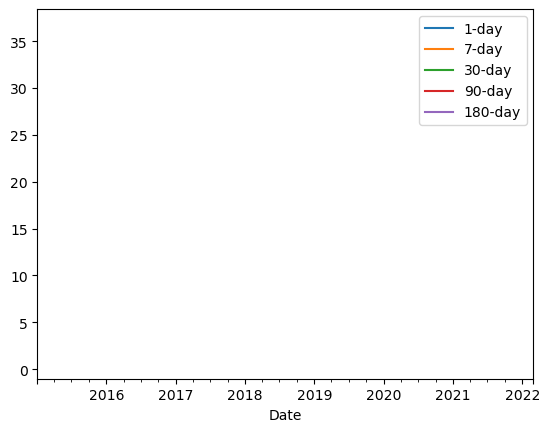

In [31]:
results = pd.DataFrame()
for frequency in [1, 7, 30, 90, 180]:
    rebalanced_returns = rebalance(returns, frequency)
    results[f'{frequency}-day'] = (rebalanced_returns+1).cumprod()
results.plot()


In [29]:
results.tail(30)

,1-day,7-day,30-day,90-day,180-day
Date,,,,,
2022-01-31,NaN,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN,NaN
2022-02-02,NaN,NaN,NaN,NaN,NaN
2022-02-03,NaN,NaN,NaN,NaN,NaN
2022-02-04,NaN,NaN,NaN,NaN,NaN
2022-02-05,NaN,14.407560,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN,NaN
